In [1]:
# Initial imports

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

C:\Users\hpp\Anaconda3\envs\py27\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

C:\Users\hpp\Anaconda3\envs\py27\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import tweepy
import csv
import datetime
import re
from textblob import TextBlob
import time



In [4]:
#get your own key and secret token online using your twitter account
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)


In [43]:
def get_all_tweets(screen_name):
    #initialize a list to hold all the tweepy Tweets
    alltweets = []	
 
    new_tweets = api.user_timeline(screen_name = screen_name,count=20)
    alltweets.extend(new_tweets)
    if len(alltweets)!=0:    
         oldest = alltweets[-1].id - 1

    while len(new_tweets) > 0:
         print "getting tweets before %s" % (oldest)
         new_tweets = api.user_timeline(screen_name = screen_name,count=50,max_id=oldest)
         alltweets.extend(new_tweets)
         oldest = alltweets[-1].id - 1
         print "...%s tweets downloaded so far" % (len(alltweets))
         if len(alltweets)>200:
            break
    #converting into csv
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in alltweets]

    with open('%s_tweets.csv' % screen_name, 'wb') as f:
         writer = csv.writer(f)
         writer.writerow(["id","created_at","text"])
         writer.writerows(outtweets)
    pass


In [6]:
 def clean_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [7]:
 def get_tweet_sentiment(tweet):
        analysis = TextBlob(clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 1
        elif analysis.sentiment.polarity == 0:
            return 0
        else:
            return -1

In [13]:
#Put screen name of the person whose followers you want
users = tweepy.Cursor(api.followers, screen_name="").items()

id=[]
while True:
    try:
        user = next(users)
    except tweepy.TweepError:
        time.sleep(60*15)
        user = next(users)
    except StopIteration:
        break
    id.append(user.screen_name)

In [92]:
for i in range(11):
    get_all_tweets(id[i])
    train=pd.read_csv(id[i]+'_tweets.csv')
    train['sentiment']=0
    if train.shape[0]!=0:
        if train.shape[0]>200:
            train=train.ix[0:200,:]
        for j in range(train.shape[0]):
            train['sentiment'][j]=get_tweet_sentiment(train.text[j])
        train.to_csv(id[i]+'_sent.csv',index=False)
    
    

getting tweets before 827051864155906047
...17 tweets downloaded so far


C:\Users\hpp\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


getting tweets before 853788723636576255
...67 tweets downloaded so far
getting tweets before 853761728924053504
...116 tweets downloaded so far
getting tweets before 850196514609676288
...128 tweets downloaded so far
getting tweets before 556242897272836095
...128 tweets downloaded so far
getting tweets before 853727475007975423
...67 tweets downloaded so far
getting tweets before 853700572792401919
...115 tweets downloaded so far
getting tweets before 841643889387741184
...135 tweets downloaded so far
getting tweets before 840854871188336639
...154 tweets downloaded so far
getting tweets before 840829765791686655
...182 tweets downloaded so far
getting tweets before 840803337259876352
...202 tweets downloaded so far
getting tweets before 854317666340929535
...70 tweets downloaded so far
getting tweets before 853411653702082561
...120 tweets downloaded so far
getting tweets before 852650009334099969
...170 tweets downloaded so far
getting tweets before 851919045167394815
...220 tweets

col_0      count
sentiment       
0             11
1              6


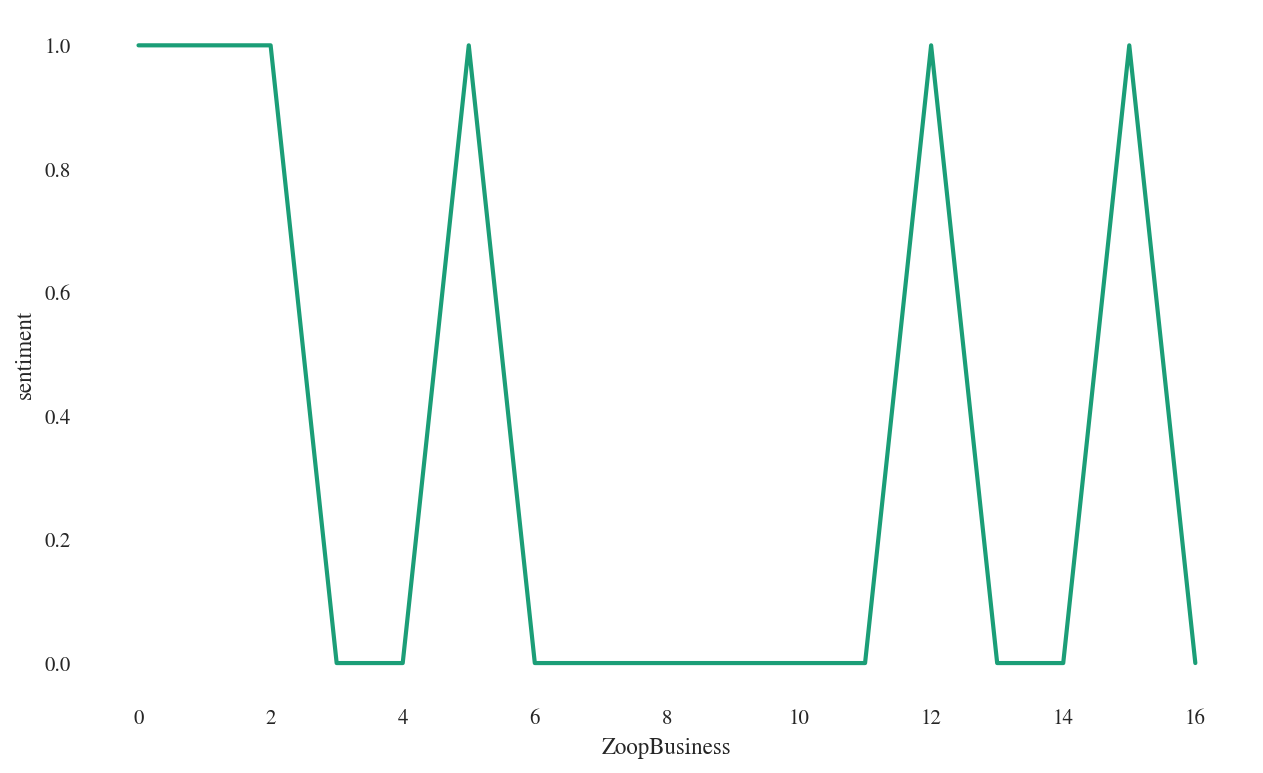

col_0      count
sentiment       
-1            14
 0            43
 1            71


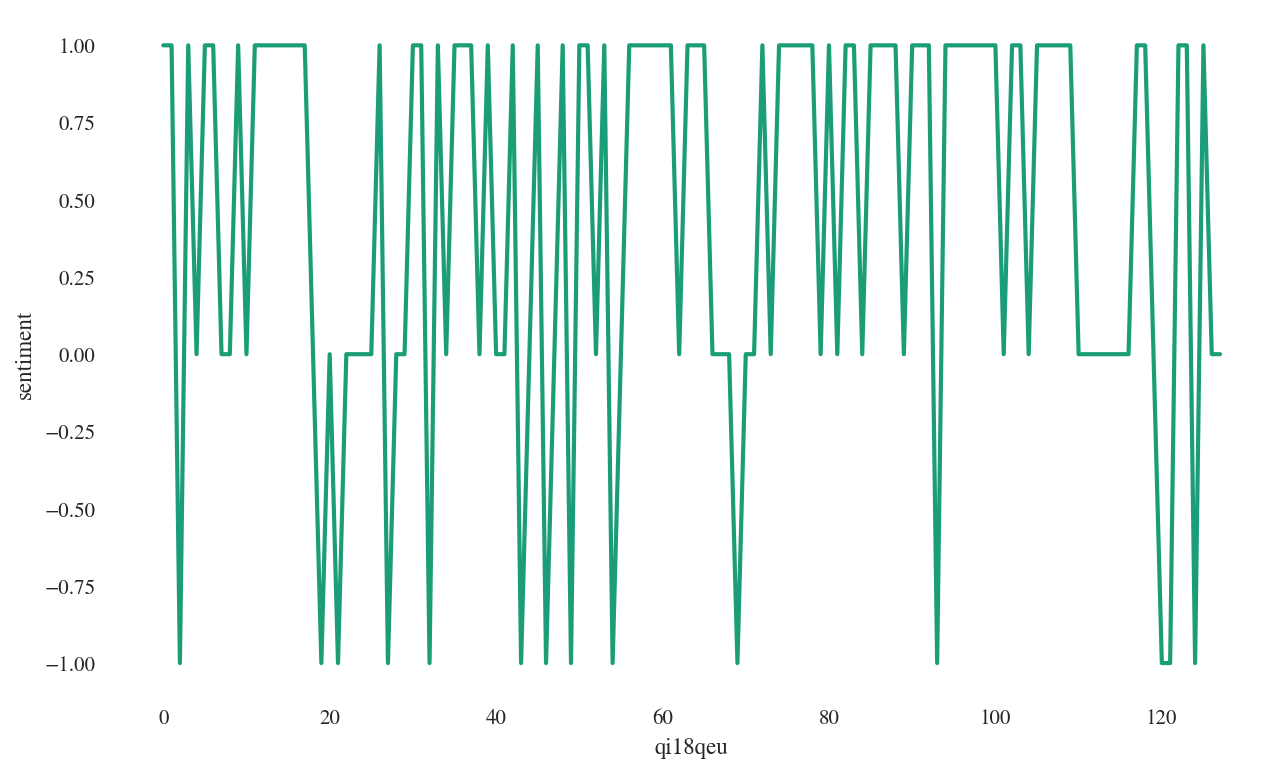

col_0      count
sentiment       
-1            16
 0            75
 1           110


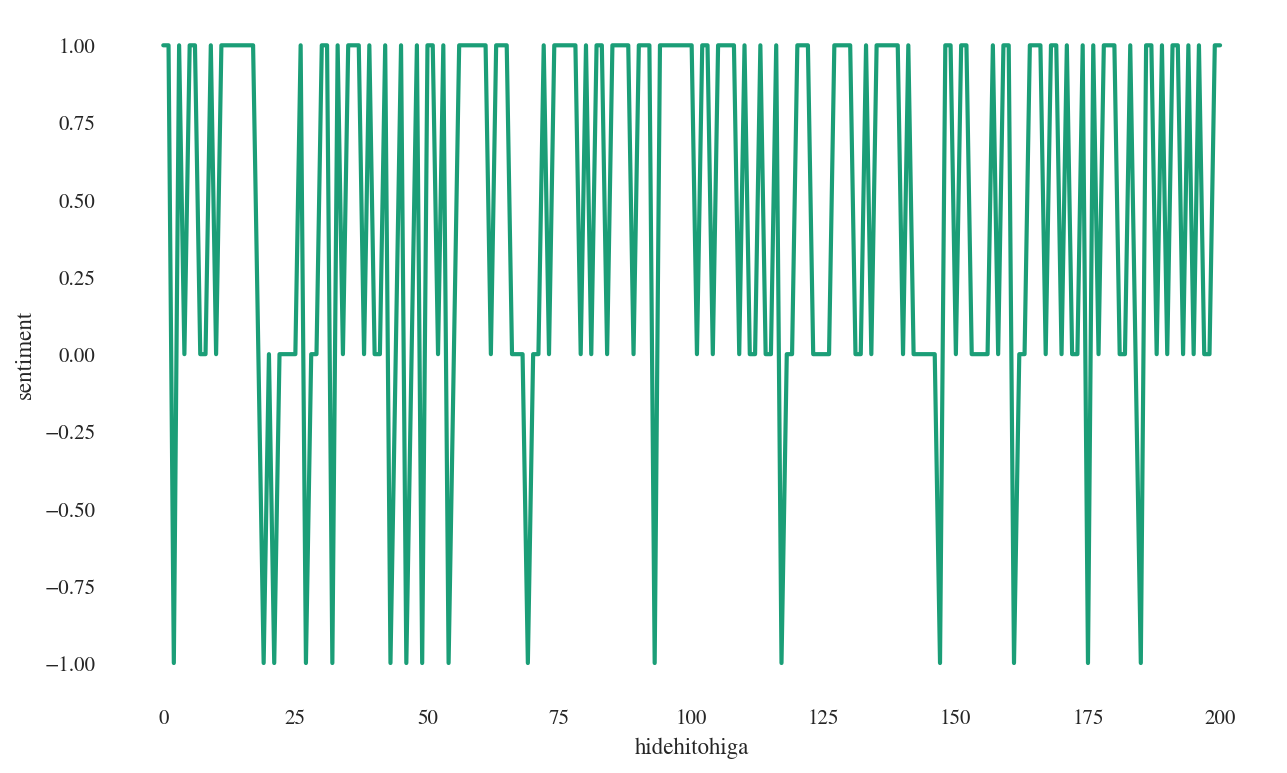

col_0      count
sentiment       
-1            17
 0            72
 1           112


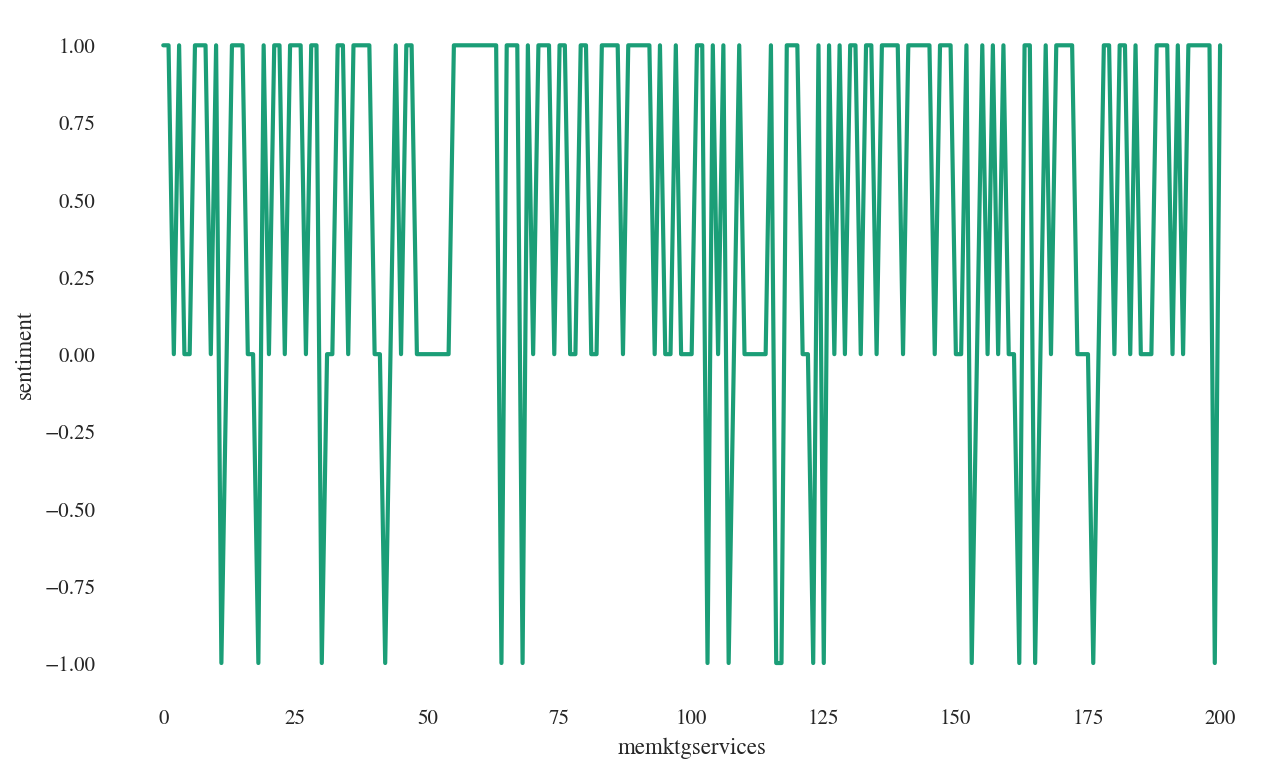

col_0      count
sentiment       
-1            28
 0            82
 1            91


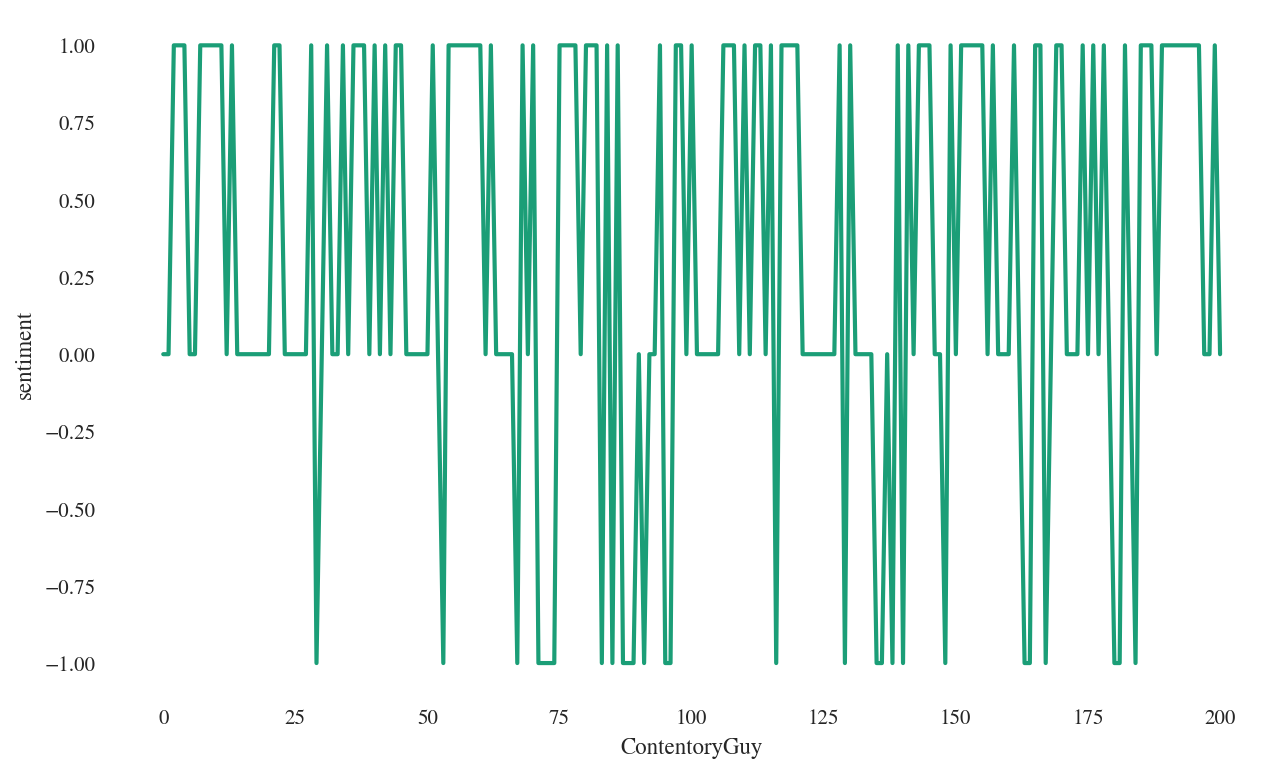

col_0      count
sentiment       
-1            10
 0            59
 1           132


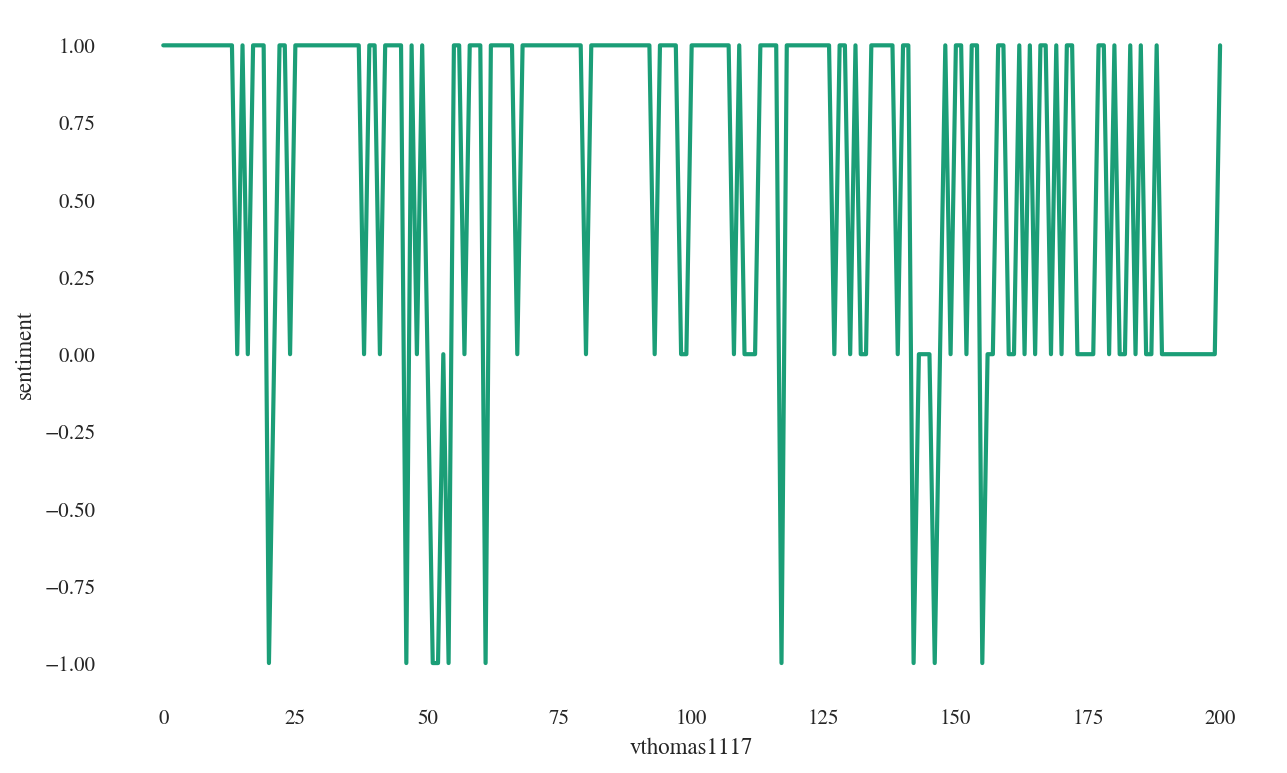

col_0      count
sentiment       
-1            15
 0            94
 1            92


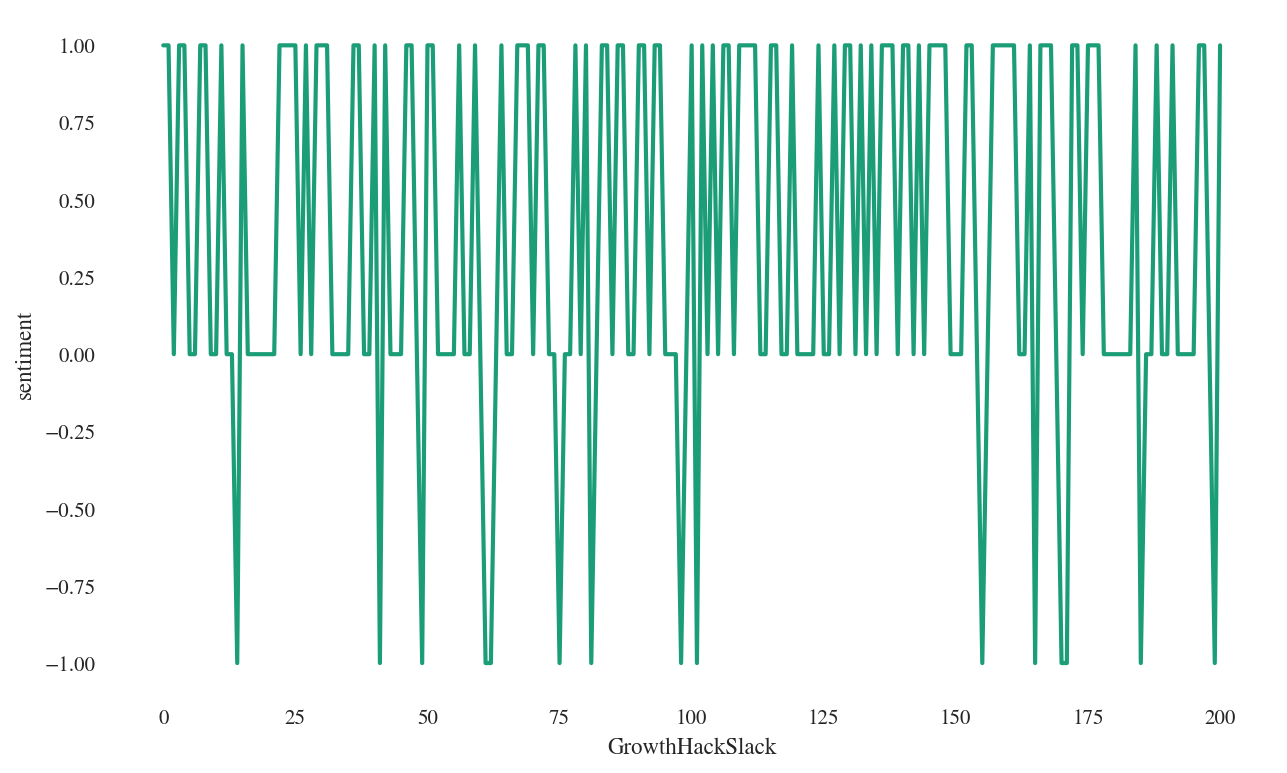

col_0      count
sentiment       
-1            12
 0            84
 1            87


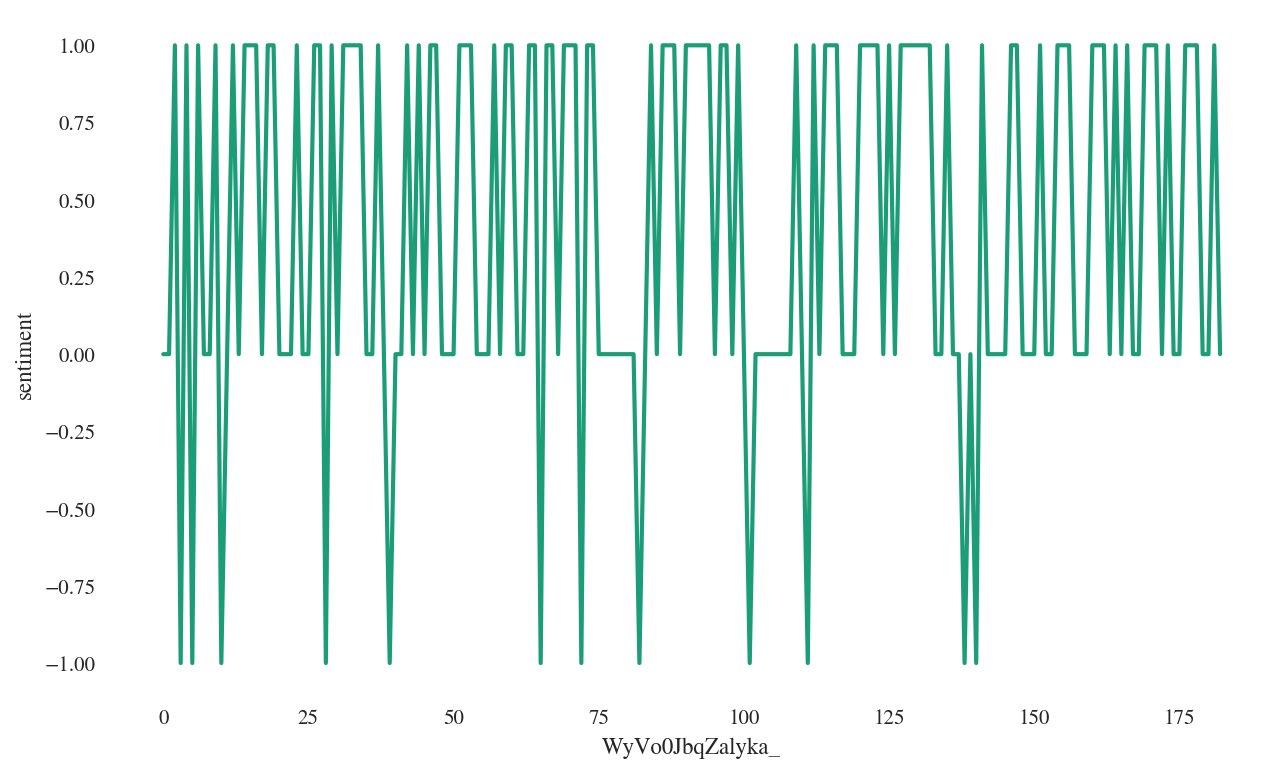

col_0      count
sentiment       
-1            11
 0            60
 1           130


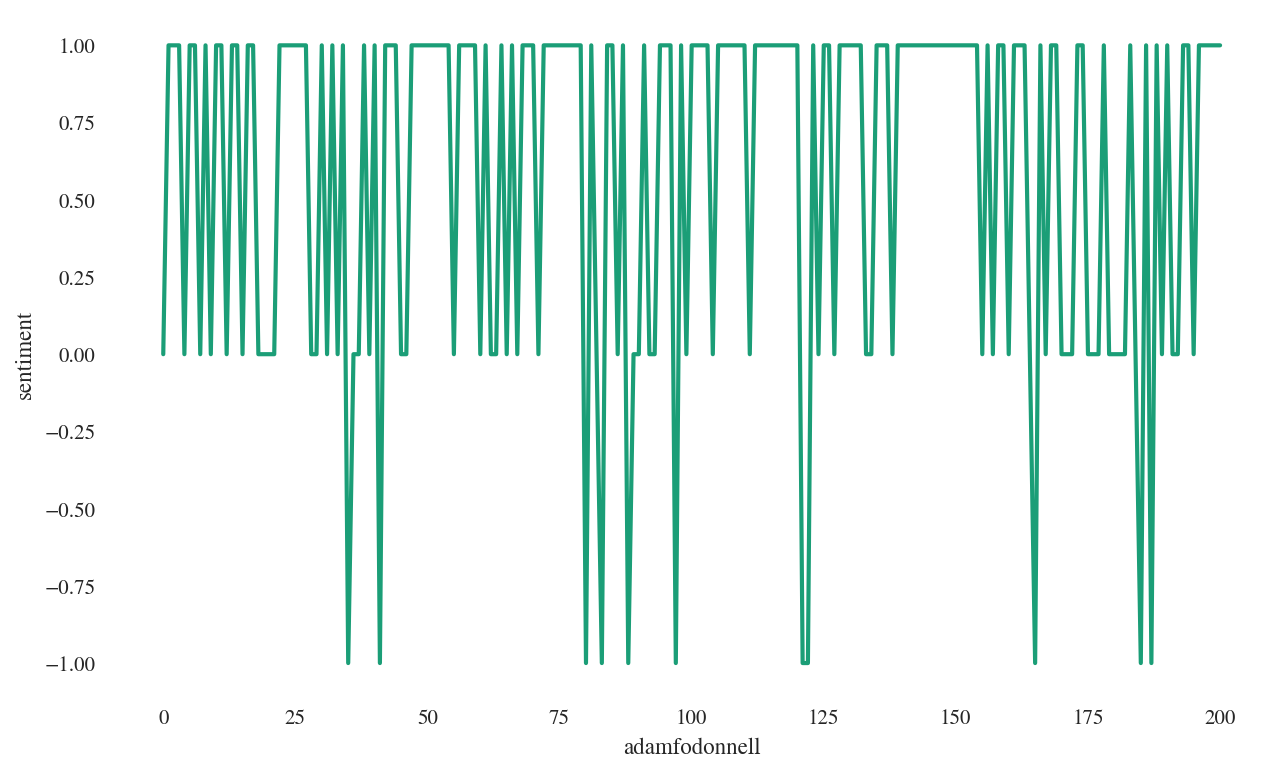

col_0      count
sentiment       
-1            14
 0            62
 1           125


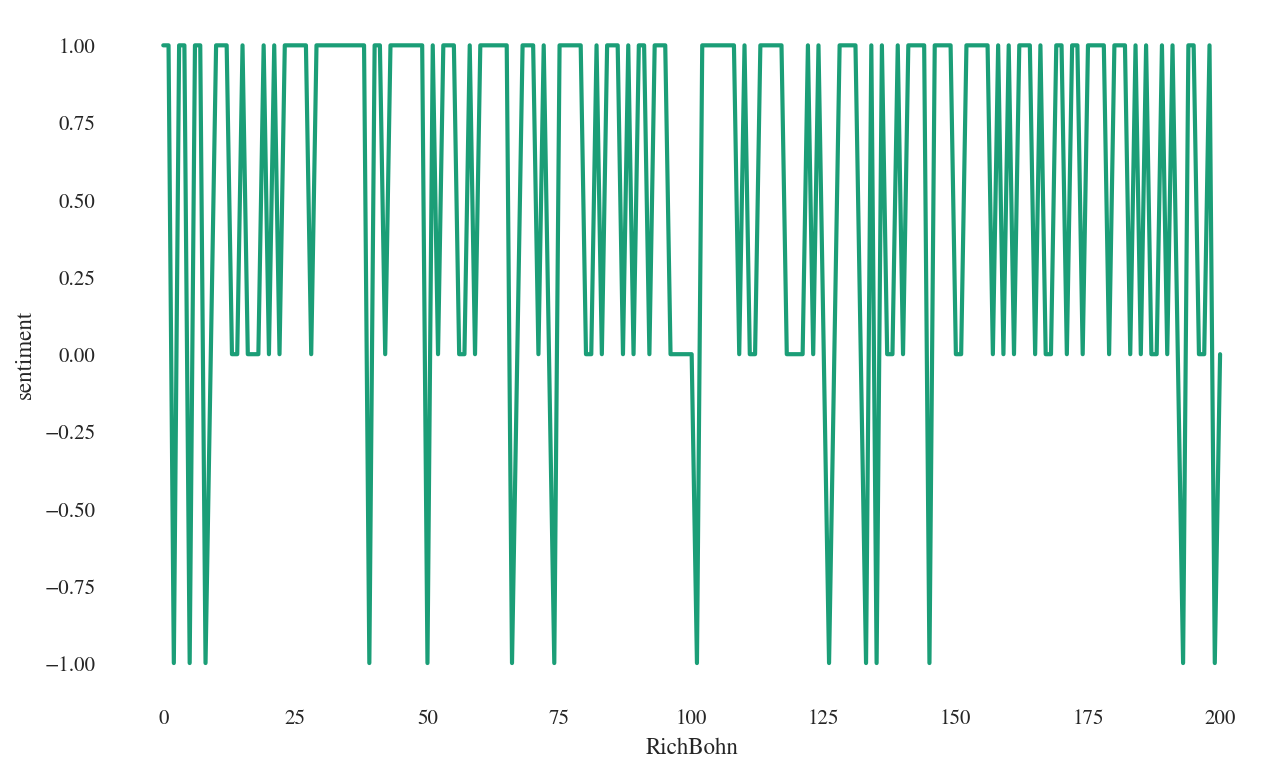

In [146]:
for i in range(1,11):
    train=pd.read_csv(id[i]+"_sent.csv")
    x=pd.crosstab(train['sentiment'],columns="count")
    print x
    plt.plot(train['sentiment'])
    plt.xlabel(id[i])
    plt.ylabel("sentiment")
    plt.show()
    
    

In [120]:
for i in range(1,11):
    train=pd.read_csv(id[i]+"_sent.csv")
    train['date']=pd.to_datetime(train['created_at'], format='%Y-%m-%d %H:%M:%S')
    train['month']=0
    train['year']=0
    for j in range(train.shape[0]):
       train['month'][j]=train['date'][j].month
       train['year'][j]=train['date'][j].year
    train.to_csv(id[i]+"date_sent.csv",index=False)
    
    

C:\Users\hpp\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hpp\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
